# Pymaceuticals Inc.
---

### Analsis
- there is little gender bias because the population sizes are very equal
- Some mice in the Infubinol treatment group have higher tumor volumes than the others, indicating variability in the response to this treatment.
- Capomulin and Ramicane show good chance in reducing tumor size compared to Infubinol and Ceftamin.
 

In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read data from files into DataFrames
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge the two DataFrames on 'Mouse ID'
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the number of unique mice IDs
unique_mice_ids = merged_df['Mouse ID'].nunique()
print("Number of unique mice IDs:", unique_mice_ids)

Number of unique mice IDs: 249


In [124]:
# Check for any mouse ID with duplicate time points
duplicate_mouse_ids = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

if len(duplicate_mouse_ids) > 0:
    print("Mouse IDs with duplicate time points:", duplicate_mouse_ids)
    for mouse_id in duplicate_mouse_ids:
        duplicate_data = merged_df[(merged_df['Mouse ID'] == mouse_id) & merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
        print("Data associated with Mouse ID", mouse_id)
        print(duplicate_data)
else:
    print("No mouse IDs with duplicate time points found.")




Mouse IDs with duplicate time points: ['g989']
Data associated with Mouse ID g989
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000              

In [125]:
# Create a clean DataFrame by dropping duplicate mice by their ID
cleaned_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(cleaned_df)





Cleaned DataFrame:
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898              

In [126]:
# Display the number of unique mice IDs in the cleaned DataFrame
unique_mice_ids_cleaned = cleaned_df['Mouse ID'].nunique()
print("Number of unique mice IDs in the cleaned DataFrame:", unique_mice_ids_cleaned)





Number of unique mice IDs in the cleaned DataFrame: 249


## Summary Statistics

In [127]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for better output 
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Display the summary statistics table
print("Summary Statistics of Tumor Volume for Each Regimen:")
print(summary_stats)



Summary Statistics of Tumor Volume for Each Regimen:
                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

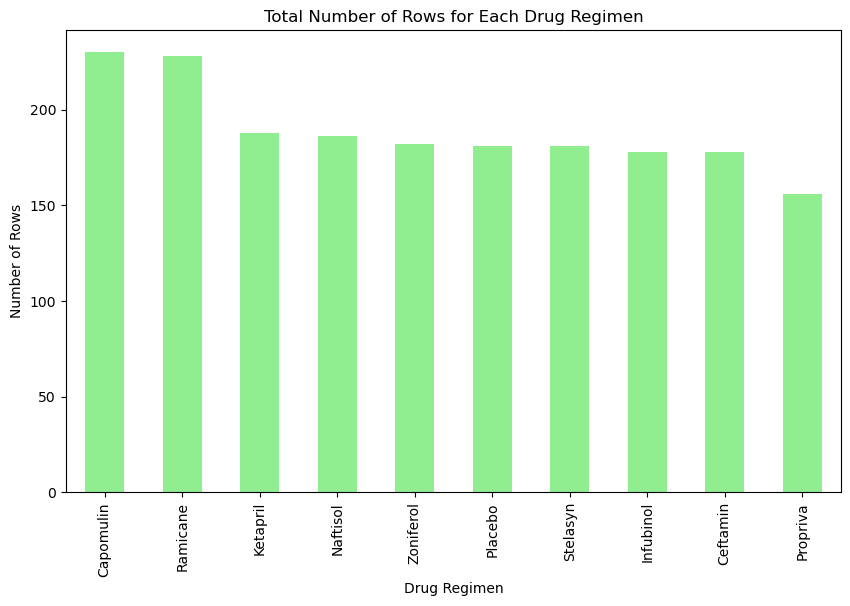

In [128]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each drug regimen
drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()

# Create bar chart
drug_regimen_counts.plot(kind='bar', color='lightgreen', figsize=(10, 6))

# title/labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

#print bar chart 
plt.show()


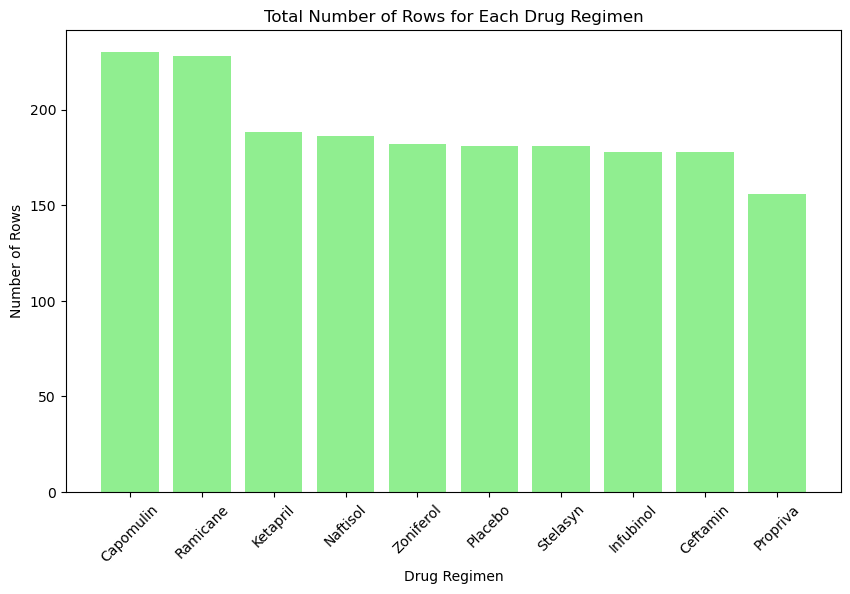

In [129]:

# Count the number of rows for each drug regimen
drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()

# Get the drug regimen names and corresponding counts
regimens = drug_regimen_counts.index
counts = drug_regimen_counts.values

# Crea bar chart
plt.figure(figsize=(10, 6))
plt.bar(regimens, counts, color='lightgreen')

# title/labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# im not sure if this is how you rotate the axis but after lot of reading this works, because i thought it would look better 
plt.xticks(rotation=45)

# print bar chart 
plt.show()



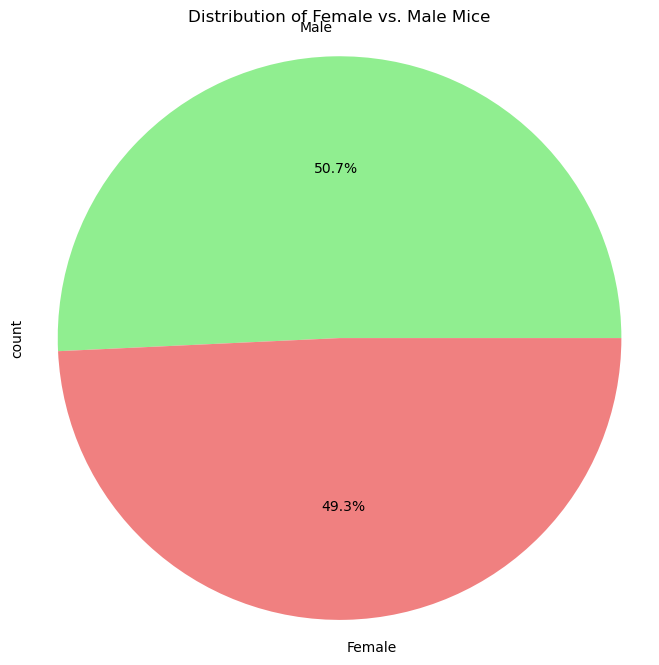

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count of male and female mice
gender_distribution = cleaned_df['Sex'].value_counts()

# Creatinf the pie chart with red/green 
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], figsize=(8, 8))

# Adding the title
plt.title('Distribution of Female vs. Male Mice')

# circle
plt.axis('equal')

# print pie chart
plt.show()



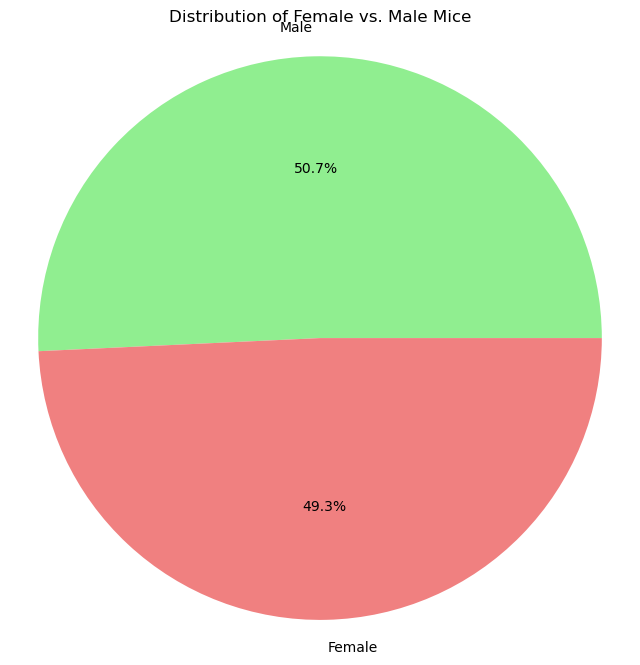

In [131]:
#pie cgart ploted by pyplot

# Count the number of male and female mice
gender_distribution = cleaned_df['Sex'].value_counts()

# Define labels and sizes for the pie plot
labels = gender_distribution.index
sizes = gender_distribution.values

# Define colors for the pie chart
colors = ['lightgreen', 'lightcoral']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Add the title
plt.title('Distribution of Female vs. Male Mice')

# make sure its a circle 
plt.axis('equal')

# print pie chart
plt.show()



## Quartiles, Outliers and Boxplots

In [132]:
# greatest timepoint 
last_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(last_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the DataFrame to include only the mice treated with Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = merged_last_timepoint[merged_last_timepoint['Drug Regimen'].isin(treatment_regimens)]

# Display the final tumor vol
print("Final Tumor Volume of Each Mouse Across the Four Treatment Regimens:")
print(final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])




Final Tumor Volume of Each Mouse Across the Four Treatment Regimens:
    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
239     y769     Ceftamin           68.594745
240     y793    Capomulin           31.896238
241     y865     Ceftamin           64.729837
245     z578     Ramicane           30.638696
246     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [133]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add tumor volumes to the list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results
    print(f"Potential outliers for {treatment}: {outliers}")



Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


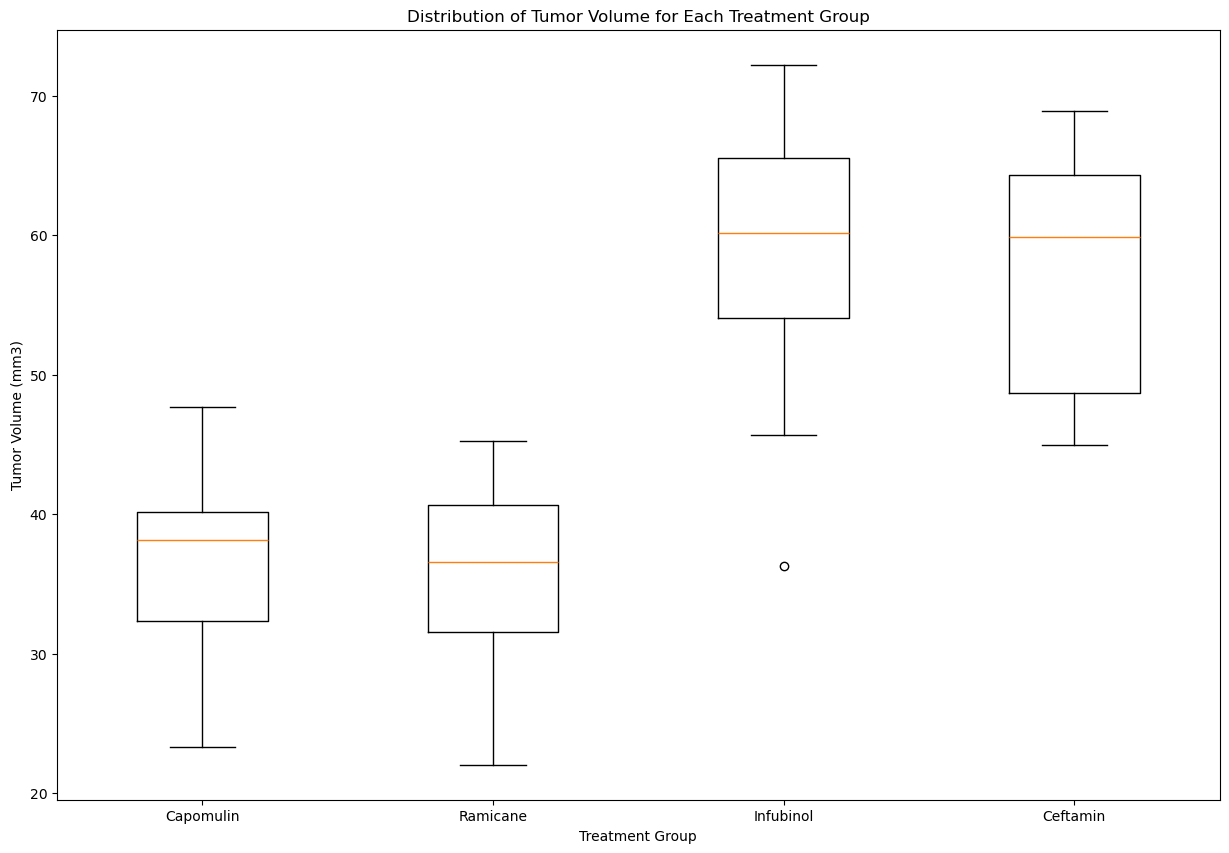

In [134]:

# box plot gen
plt.figure(figsize=(15, 10))
plt.boxplot(tumor_vol_data, labels=treatments)

# titles/labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# print boxplot
plt.show()



## Line and Scatter Plots

In [135]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [136]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [137]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
